Arquivo lido com sucesso usando a codificação: utf-8
--- Leitura da coluna Age ---


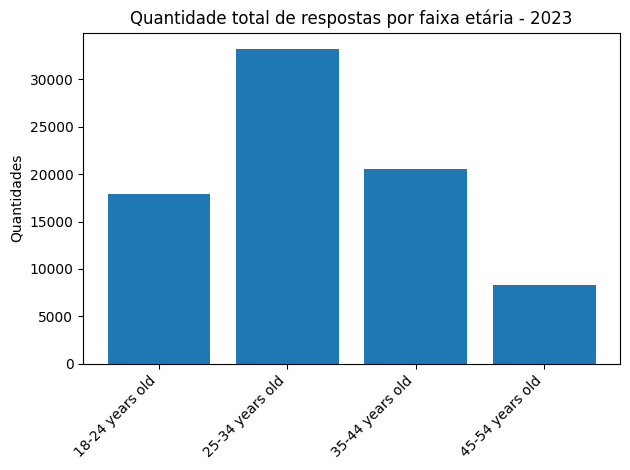

Arquivo lido com sucesso usando a codificação: utf-8
--- Leitura da coluna RemoteWork ---


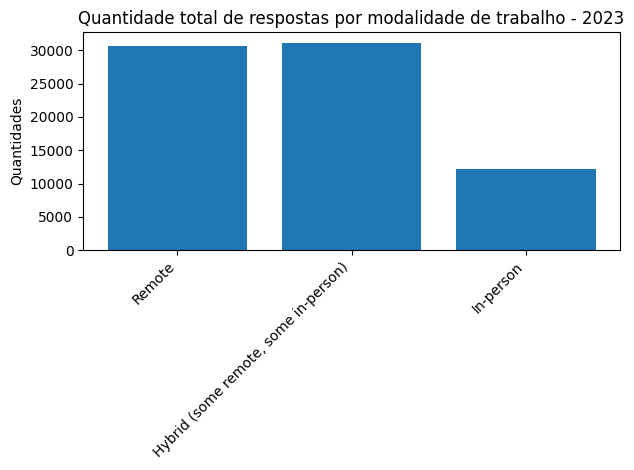

Arquivo lido com sucesso usando a codificação: utf-8
--- Leitura da coluna CodingActivities ---


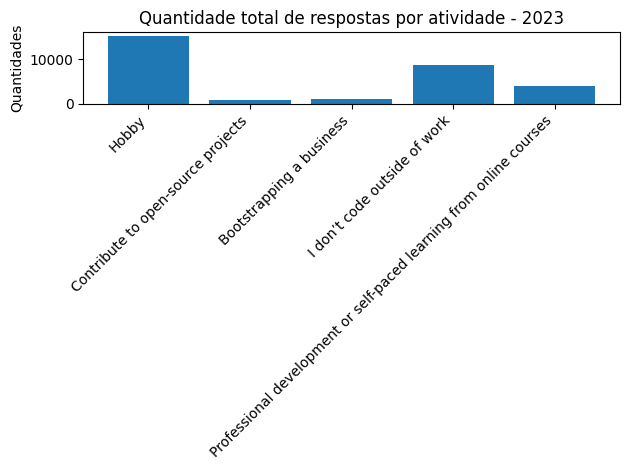

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class VisualizacaoDeDados:

    def __init__(self, path, encoding):
        self.path = path
        self.encoding = encoding

    # Função para montar o gráfico
    def mount_graphic(self, list_counts=None, list_index=None, title=None, 
                      label=None):
        if list_counts is None or list_index is None:
            print("Listas de dados e índices não podem ser None.")
            return

        index = np.arange(len(list_index))
        plt.bar(index, list_counts)
        plt.xticks(index, list_index, rotation=45, ha='right')
        plt.ylabel(label)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    # Função para tratar os dados e gerar gráficos
    def treats_the_data(self, column_name, title=None, label=None, 
                        column_data_one=None, column_data_two=None,
                        column_data_three=None, column_data_four=None, 
                        column_data_five=None):

        # ler o arquivo CSV
        try:
            df = pd.read_csv(self.path, encoding=self.encoding)
            print(f"Arquivo lido com sucesso usando a codificação: {self.encoding}")
        except UnicodeDecodeError:
            print(f"Erro ao ler o arquivo com a codificação: {self.encoding}")
            return
        except FileNotFoundError:
            print(f"Erro: O arquivo em {self.path} não foi encontrado.")
            return
        except pd.errors.EmptyDataError:
            print("Erro: O arquivo está vazio.")
            return
        except pd.errors.ParserError:
            print("Erro: Ocorreu um problema ao analisar o arquivo.")
            return
        except Exception as e:
            print(f"Ocorreu um erro: {e}")
            return

        # Verificando se o DataFrame foi carregado com sucesso
        if df is not None:
            try:
                print(f'--- Leitura da coluna {column_name} ---')
                column = df[column_name].dropna()

                # Inicializando listas para os dados e índices
                data_index = []
                counts = []

                # Adicionando dados e índices à lista se os parâmetros forem fornecidos
                if column_data_one:
                    data_index.append(column_data_one)
                    counts.append(column.value_counts().get(column_data_one, 0))
                if column_data_two:
                    data_index.append(column_data_two)
                    counts.append(column.value_counts().get(column_data_two, 0))
                if column_data_three:
                    data_index.append(column_data_three)
                    counts.append(column.value_counts().get(column_data_three, 0))
                if column_data_four:
                    data_index.append(column_data_four)
                    counts.append(column.value_counts().get(column_data_four, 0))
                if column_data_five:
                    data_index.append(column_data_five)
                    counts.append(column.value_counts().get(column_data_five, 0))

                # Montando o gráfico
                self.mount_graphic(list_counts=counts, list_index=data_index, 
                                   title=title, label=label)

            except KeyError:
                print(f'A coluna {column_name} não existe no DataFrame.')
            except Exception as e:
                print(f'Ocorreu um erro ao processar os dados: {e}')
        else:
            print("Falha ao ler o arquivo com as codificações testadas.")

# Exemplo de uso
path = '/home/lucas/Documentos/faculdade/projects/visualizacao_da_informacao/stack-overflow-developer-survey-2023/survey_results_public.csv'
encoding = 'utf-8'
visualizacao = VisualizacaoDeDados(path, encoding)

visualizacao.treats_the_data(column_name='Age', title='Quantidade total de respostas por faixa etária - 2023',
                label='Quantidades', column_data_one='18-24 years old', 
                column_data_two='25-34 years old', column_data_three='35-44 years old',
                column_data_four='45-54 years old')

visualizacao.treats_the_data(column_name='RemoteWork', title='Quantidade total de respostas por modalidade de trabalho - 2023',
                label='Quantidades', column_data_one='Remote', 
                column_data_two='Hybrid (some remote, some in-person)', column_data_three='In-person')

visualizacao.treats_the_data(column_name='CodingActivities', title='Quantidade total de respostas por atividade - 2023',
                label='Quantidades', column_data_one='Hobby', column_data_two='Contribute to open-source projects', 
                column_data_three='Bootstrapping a business', column_data_four="I don’t code outside of work",
                column_data_five='Professional development or self-paced learning from online courses')